In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import sklearn

In [2]:
df_sales = pd.read_excel('IVY DATA Normalized.xlsx',encoding='latin1')
df_sales.head()

,S.No,Order No.,date,Company,Cuid,Customer,Employee,sales,Discount,Total,Order Type,View,Month
0,8179,115047,2019-01-01 10:06:35,Treet,6014,Hafeez Gen Store,Asad Bokhari,406.0008,0,406.0008,DELIVERED,View,Jan
1,6688,115653,2019-01-01 10:25:15,Treet,5680,Javaid Pan Shop,Mohd. Umer,826.9992,0,826.9992,DELIVERED,View,Jan
2,1412,115529,2019-01-01 10:25:54,Treet,4628,M.A Karyana @ Nishat Colony,Asif Mannan,52.7082,0 0,52.7082,DELIVERED,View,Jan
3,1413,115530,2019-01-01 10:26:23,Treet,4629,Subhan Store @ Nishat Colony,Asif Mannan,101.5002,0 0,101.5002,DELIVERED,View,Jan
4,1414,115531,2019-01-01 10:26:41,Treet,4626,Hafiz cold corner,Asif Mannan,203.0004,0 0,203.0004,DELIVERED,View,Jan


In [3]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.set_index('date', inplace=True)


In [4]:
df_sales.drop(['Cuid','S.No','Order No.','Total'],axis=1,inplace=True)

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114594 entries, 2019-01-01 10:06:35 to 2019-12-31 20:01:57
Data columns (total 8 columns):
Company       114594 non-null object
Customer      114594 non-null object
Employee      114594 non-null object
sales         114594 non-null float64
Discount      114594 non-null object
Order Type    114594 non-null object
View          114594 non-null object
Month         114594 non-null object
dtypes: float64(1), object(7)
memory usage: 7.9+ MB


In [6]:
#represent month in date field as its first day



#groupby date and sum the sales
ddf=df_sales.resample('D').sum()
#df_sales = df_sales.groupby('date').sales.sum().reset_index()

In [7]:
ddf.head(50)

,sales
date,
2019-01-01,3.294529e+05
2019-01-02,3.364932e+05
2019-01-03,4.056750e+05
2019-01-04,3.263562e+05
2019-01-05,3.307377e+05
2019-01-06,5.659497e+05
2019-01-07,4.340119e+05
2019-01-08,3.595576e+05
2019-01-09,9.196317e+05


In [8]:
ddf.head(200)

,sales
date,
2019-01-01,3.294529e+05
2019-01-02,3.364932e+05
2019-01-03,4.056750e+05
2019-01-04,3.263562e+05
2019-01-05,3.307377e+05
...,...
2019-07-15,3.918355e+05
2019-07-16,1.555098e+06
2019-07-17,9.905381e+05


In [9]:
#df_sales = df_sales.set_index('date')
#df_sales.index

In [10]:
# d = ddf['sales'].resample('W').sum()


In [11]:
# y['2019':]

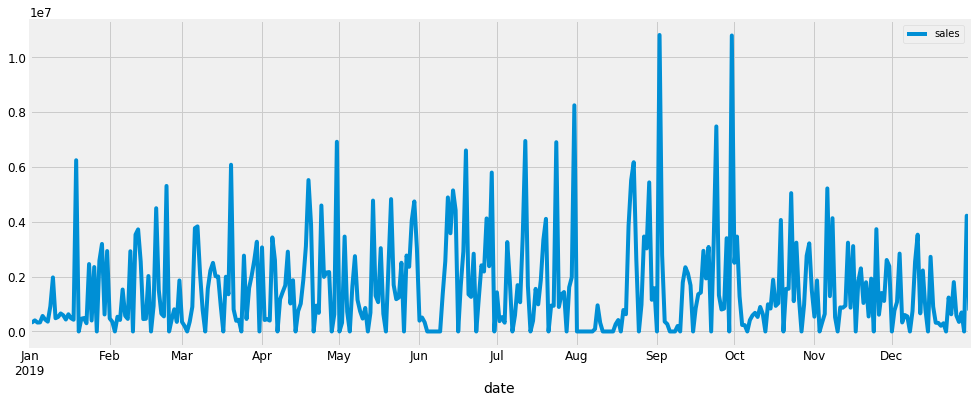

In [12]:
ddf.plot(figsize=(15, 6))
plt.show()
# Graph wrt 10 Million

In [13]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

In [37]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [38]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ddf,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
   
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11707.812023036717
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11285.824342316406
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:10894.671853551885
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:11362.151861321874
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10809.350609608446
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:10436.338231710048
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:11347.565840417468
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:10627.606065899396
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:10199.727702068207
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11284.285904490473
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:11179.909273637366
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:10802.622518058233
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10929.086485031658
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10809.514173762465
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10425.416168969383
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:10817.47153715116
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:10564.509487369342
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:10140.159373

ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:10915.570205569878
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:10755.673314258125
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:10368.40237916993
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:10837.166209458857
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:10648.696518338547
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:10239.515982204222
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:10755.41810304423
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:10755.024871007063
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:10662.227778752585
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10511.441934397073
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:10464.808035913478
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:10370.191718720069
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10398.56245737513
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:10347.226540246524
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:10240.97212880135
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:12019.243636235686
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:11632.549149851127
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:11224.427734326

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:11317.591958766134
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:10848.909420613214
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:10465.267777009805
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:11291.992193050122
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:10781.75736333496
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10361.420944618641
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:11180.411867162604
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:11084.698115216044
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:10703.56886933395
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:10988.075491320584
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:10850.90923312091
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:10465.13399089535
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:10920.331619712308
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:10771.167757690218
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:10363.401707961413
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:10798.083304298589
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:10798.168527718488
ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:10704.941583924

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:10582.592617277933
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:10562.722539596232


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:10466.490886240423
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10493.485251061764
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:10468.345030867771


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:10369.120394117048
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:11596.94164032648
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:11215.477224672386
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:10833.318605673638
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:11355.631071857737
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:10828.77130538002
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:10451.682980214424
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:11337.543501344939
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:10720.702417081942
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:10291.845495229123
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:11213.135542203963
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:11173.658900405637
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:10793.856043275235
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:10903.38676597205
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:10830.649951580055
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10452.13233205504
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:10813.593225195511
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:10701.288334208

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:10750.934030883096
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:10693.74139152572
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:10492.8637270063
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:10454.828945805091
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:10393.265776277069
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:10371.767834699654
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:10307.054303336008
ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:10233.852724971184
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:11581.857828944187
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:11212.17797095923
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:10826.73903767044
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:11445.763647075097
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:10889.83618351498
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:10510.316499431767
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:11421.44789324977
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:10798.767985021928
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:10363.698605514544
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:11212.193487527244

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:11434.9778605127


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:11068.071491661201
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:10659.112734214243
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:11442.343514469965
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:10917.048573731965
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:10480.332060658875
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:11245.724987072252
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:10655.15270327689
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:10224.378220338194


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:11128.921491531844


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:11070.003353944541


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:10661.295360760345
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:11039.904290651275
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:10919.047589258273
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:10481.5467001414
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:10797.576673844638
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:10636.594198640021


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:10278.655091732708
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:10721.844829812318
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:10724.162152491821
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:10663.344561447488
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:10581.525371831129
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:10554.163644604556
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:10483.138957801066
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:10356.688058609132
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:10302.045785650358
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:10227.872613923055
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:11810.656575440886
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:11432.218271746715
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:11036.323486569872
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:11676.648309074415
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:11105.474549821789
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:10716.817033040697
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:11646.089546949552
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:11012.53057

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:11367.110671764418
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:10801.997741125379
ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10372.030120220617
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:11204.518977233667
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:11171.077712262744
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:10786.88541413281
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:10992.048581630635
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:10896.144901517317
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:10510.09175697196
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:10901.141595925426
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:10786.677655687126
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:10374.006380417268
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:10819.496795584784
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:10818.437170128656
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:10788.860687845172
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:10580.736998550427
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:10544.871994410045
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:10511.8705792

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:10440.355212087452
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:10866.133899470165
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:10747.73838944322
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:10339.775000643489
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:10737.555061773868


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:10737.535724873118


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:10675.79498673238
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:10530.527509864081


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:10505.461758816338


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:10441.719487993094
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:10439.350338336137


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:10411.7584966021


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:10343.003936273864
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:11538.162096456816
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:11196.612339881245
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:10816.308951146131
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:11326.33522080327
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:10829.310532064068
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10452.65020790436
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:11307.060279678863
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:10723.219509123612
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10294.298598476727
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:11165.693034881715
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:11139.017574463267
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:10790.310408132409
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:10873.504654247023
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:10799.31742568774
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:10452.811007753575
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:10783.143425744789
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:10671.42301618

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:12890.099883317733
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:13961.316168711164
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:11107.631174547387
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:11097.411860040484
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:10719.252170104308
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:10873.229383320722
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:10782.926503764895
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:10406.630057172966
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10914.310165417564


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:13139.998452908065
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14322.018118954387
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:10727.414350022
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:10719.146259887431


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:10725.02106653562
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:10463.821943558985
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:10406.521109163192


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:10408.452901385728


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:10607.257449498851


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:13966.541768914722
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:17087.32246216589
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:11448.94252796557
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:11081.407836537735
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:10690.109657636713
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:11261.170335532872
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:10938.62432199371
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:10392.117260627805
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:11277.020828527886
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:10655.430528098743


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:10228.040560788242
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:11112.100161882783


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:11066.486050494916


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:10688.8632223483
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:11008.768967658041


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:10750.68497692277


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:10378.116909656375
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:10764.924564998495
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:10639.941641094025
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:10231.35363199081


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:10726.64466544988


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:10730.045917695188


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:10698.520382812567
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:10544.202916501708


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:10527.613178198926
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:10393.888560754505
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:10325.35381529416
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:10269.86449636783


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:10232.295268465736
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:11533.018069501722
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:11193.979240045848
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:10809.304584672716
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:11383.32674796184
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:10867.780166337285
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10488.760038821016
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:11351.033968550939
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:10765.705867392862
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10333.806163045716
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:11163.314738365209
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:11160.749794531625
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:10811.261723317559
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:10936.65071820371
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:10837.278878355464
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:10488.441708183478
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:10834.468971522754
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:10716.8236499

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:10273.379963776397
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:10697.114761013781
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:10696.303252122489
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:10697.970881090645
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:10454.090130816827


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:10417.258719543246
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:10410.21562633157
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:10334.302697413841
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:10282.92871077003
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:10274.797875978442
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:11587.629394836
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:11219.047128124806
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:10757.269169046733
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:11437.874290612017
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:10909.68938054934
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:10474.085749710128
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:11355.324773864544
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:10802.933060178886
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:10342.083868879043
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:11251.193029314083
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:11220.192610818482
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:10758.736447730484
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:10991.45002047375

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:10225.608250178691
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:10801.063784737664
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:10802.221291874657
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:10760.256425134015
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:10439.975300104026
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:10389.057973098095


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:10370.420285422106
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:10420.828544586599
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:10268.804426727818
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:10227.108017683118
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:11712.974477628046
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:11368.346423248333
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:10976.987476483806
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:11567.827340953958
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:11039.252079427792
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:10653.863159599154
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:11533.700485802126
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:10938.948538595414
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10496.702066002732
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:11336.923024638902
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:11333.902951636559
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:10978.991778833992
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:11104.833028174071
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:11008.55623

C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:11218.081452721386
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:10820.277518068617
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:10936.983802001
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:10839.379301475044
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:10453.14103274565
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:10820.695030588027


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:10730.999016185664
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:10330.874870282434
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:10854.867056950547
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:10855.300848948447
ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:10822.216540609254


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:10487.607557854695
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:10489.47597783824


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:10455.07988486678


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:10391.874724595407


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:10361.653616724434


C:\Users\waqarkhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:10332.366993115258


In [30]:
mod = sm.tsa.statespace.SARIMAX(ddf,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 365),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10


IndexError: index 0 is out of bounds for axis 0 with size 0

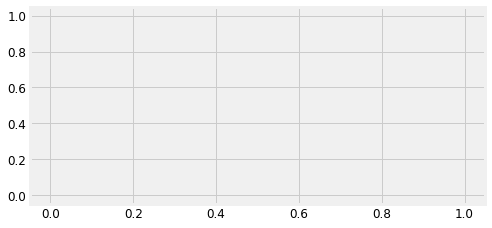

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
#KDE (In statistics, kernel density estimation is a non-parametric way 
#to estimate the probability density function of a random variable. 
#Kernel density estimation is a fundamental data smoothing problem 
#where inferences about the population are made, based on a finite data sample)

Residual:Relationship between a given independent variable and the response variable given that other independent variables are also in the model.

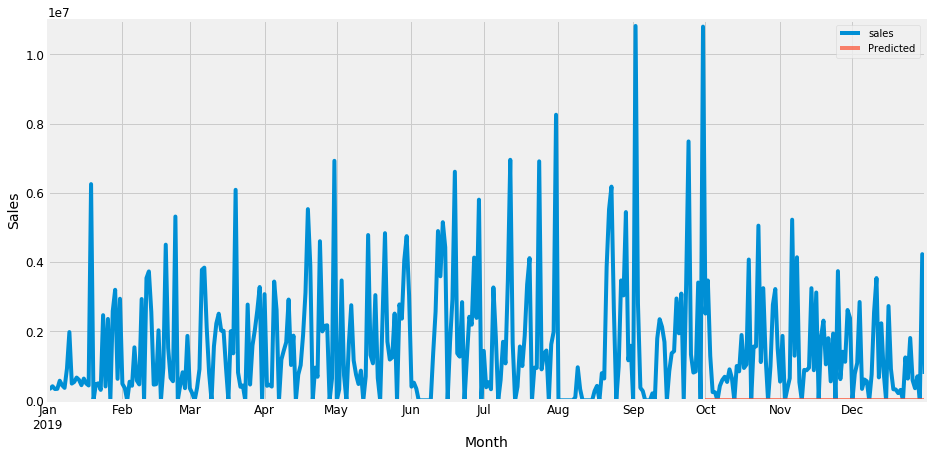

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2019-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ddf['2019':].plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7),ylim=(0,11000000))
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# plot_data = [
#     go.Scatter(
#         x=pred_ci['date'],
#         y=pred_ci['sales'],
#         name='actual'
#     ),
#         go.Scatter(
#         x=pred_ci['date'],
#         y=pred_ci['pred_value'],
#         name='predicted'
#     )
    
# ]

# plot_layout = go.Layout(
#         title='Sales Prediction'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)

In [34]:
y_forecasted = pred.predicted_mean
y_truth = ddf['2019-11-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2019-10-01 00:00:00   NaN
2019-10-02 00:00:00   NaN
2019-10-03 00:00:00   NaN
2019-10-04 00:00:00   NaN
2019-10-05 00:00:00   NaN
                       ..
2019-12-28 00:00:00   NaN
2019-12-29 00:00:00   NaN
2019-12-30 00:00:00   NaN
2019-12-31 00:00:00   NaN
sales                 NaN
Length: 93, dtype: float64


y_forecasted = pred.predicted_mean
y_truth = y['2019-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [35]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2019-10-01 00:00:00   NaN
2019-10-02 00:00:00   NaN
2019-10-03 00:00:00   NaN
2019-10-04 00:00:00   NaN
2019-10-05 00:00:00   NaN
                       ..
2019-12-28 00:00:00   NaN
2019-12-29 00:00:00   NaN
2019-12-30 00:00:00   NaN
2019-12-31 00:00:00   NaN
sales                 NaN
Length: 93, dtype: float64


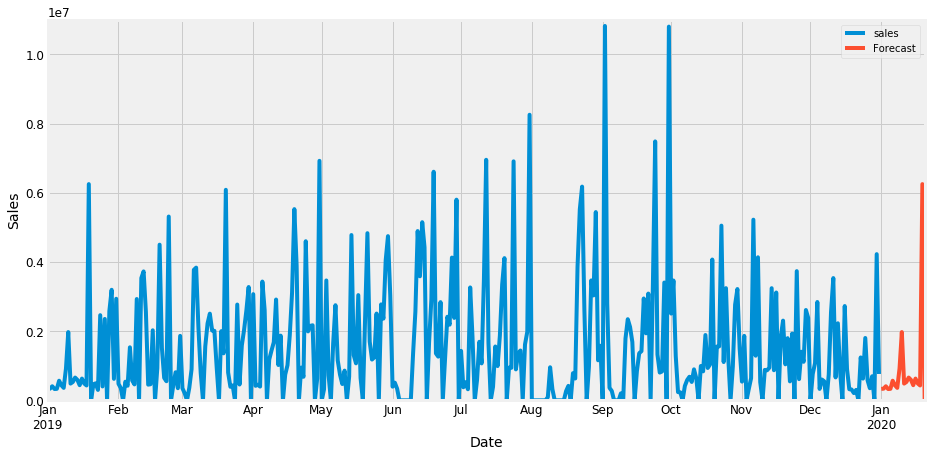

In [36]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = ddf.plot(label='observed', figsize=(14, 7),ylim=(0,11000000))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()